In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [31]:
### LOAD THE DATA
data = pd.read_csv('spambase/spambase.csv')
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [32]:
### DATA CLEANING
# check for NaN/None/string cells (if any exist throw an error)
for index, row in data.iterrows():
    for val in row.values:
        # check if value is NaN or None
        if pd.isnull(val):
            raise Exception('NaN/None value')
        # check if value is not number
        try:
            float(val)
        except:
            raise Exception('Non number value')

In [33]:
### SPLIT DATA INTO TRAINING/TESTING DATA
# first, split into x/y data
X = []
for (col_name, col_data) in data.iteritems():
    if col_name != 'spam':
        X.append(col_data)
X = np.array(X).T
Y = np.array(data['spam'])
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, train_size=.7)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3220, 57)
(3220,)
(1381, 57)
(1381,)


In [34]:
### FIND IMPORTANT COLUMNS

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
feature_imp = pd.Series(clf.feature_importances_,index=[col for col in data.columns if col != 'spam']).sort_values(ascending=False)

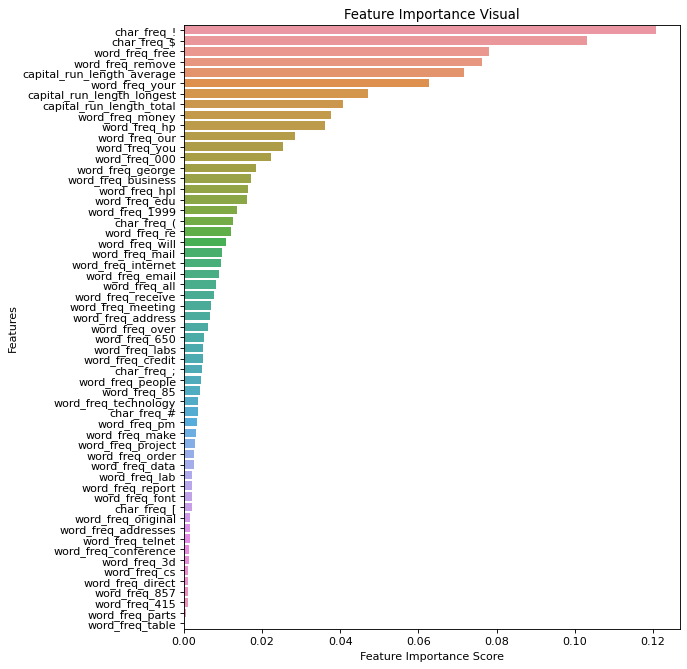

In [35]:
# visualize importances with bargraph
plt.figure(figsize=(8,10), dpi=80)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Visual')
plt.show()

From the graph above, we estimate that anything with an importance score >= 0.1 is POGGERS in our classification task.

<h3>Logistic Regresion</h3>

In [ ]:
# find optimal parameters using validation curve


<h3>K Nearest Neighbors</h3>

In [29]:
### K NEAREST NEIGHBORS IMPLEMENTATION

<h3>Support Vector Machine</h3>

In [ ]:
### SUPPORT VECTOR MACHINE IMPLEMENTATION

<h3>Random Forest</h3>

In [ ]:
### RANDOM FOREST (one forest, many trees :)) IMPLEMENTATION